# Práctica: Regresión Múltiple

Eres parte de un grupo de investigación enfocado en el comportamiento social. Actualmente, tu grupo se encuentra analizando una base de datos de comportamiento antisocial en Estados unidos. Cuentas con las siguientes variables:

- moralIntegration: Compuesto de la tasa de delincuencia y los gastos de bienestar.
- heterogeneity: Heterogeneidad étnica, a partir de porcentajes de residentes no blancos y blancos nacidos en el extranjero.
- mobility: Movilidad geográfica a partir de porcentajes de residentes que entran y salen de la ciudad.
- region: E = Northeast, MW = Midwest, S = Southeast, W = West 

Para empezar, se te ha asignado la exploración de posibles variables que puedan influir en el comportamiento antisocial en las diferentes ciudades. 

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Angell.txt", sep=r'\s{1,}', engine='python')
angell_data = pd.get_dummies(df, drop_first = True)
angell_data

,moralIntegration,heterogeneity,mobility,region_MW,region_S,region_W
Rochester,19.0,20.6,15.0,0,0,0
Syracuse,17.0,15.6,20.2,0,0,0
Worcester,16.4,22.1,13.6,0,0,0
Erie,16.2,14.0,14.8,0,0,0
Milwaukee,15.8,17.4,17.6,1,0,0
Bridgeport,15.3,27.9,17.5,0,0,0
Buffalo,15.2,22.3,14.7,0,0,0
Dayton,14.3,23.7,23.8,1,0,0
Reading,14.2,10.6,19.4,0,0,0
DesMoines,14.1,12.7,31.9,1,0,0


## Parte 1: Diseño

1. Estandariza los datos y explora las correlaciones entre las variables a través de un mapa de calor. ¿Qué observas?  

In [9]:
# Transformacion Z
scaler = StandardScaler()
scaled_data = scaler.fit_transform(angell_data)
scaled_angell_data = pd.DataFrame(scaled_data, columns=angell_data.columns)
scaled_angell_data

,moralIntegration,heterogeneity,mobility,region_MW,region_S,region_W
0,2.209629,-0.533992,-1.302175,-0.694808,-0.694808,-0.402694
1,1.643057,-0.781852,-0.764670,-0.694808,-0.694808,-0.402694
2,1.473086,-0.459635,-1.446887,-0.694808,-0.694808,-0.402694
3,1.416429,-0.861166,-1.322848,-0.694808,-0.694808,-0.402694
4,1.303115,-0.692622,-1.033422,1.439246,-0.694808,-0.402694
5,1.161472,-0.172118,-1.043759,-0.694808,-0.694808,-0.402694
6,1.133143,-0.449720,-1.333184,-0.694808,-0.694808,-0.402694
7,0.878186,-0.380320,-0.392551,1.439246,-0.694808,-0.402694
8,0.849857,-1.029711,-0.847363,-0.694808,-0.694808,-0.402694
9,0.821529,-0.925610,0.444715,1.439246,-0.694808,-0.402694


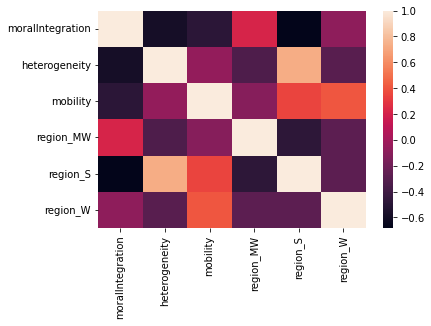

In [10]:
import seaborn as sns
sns.heatmap(scaled_angell_data.corr());

2. Implementa un modelo de regresión múltiple que tome como variable dependiente a la variable `workingMom` y como variables independientes al resto.

In [11]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Fit regression model 
model = smf.ols("moralIntegration ~ heterogeneity + mobility + region_MW + region_S + region_W", data=scaled_angell_data).fit();

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       moralIntegration   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     16.27
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           1.77e-08
Time:                        14:33:38   Log-Likelihood:                -36.013
No. Observations:                  43   AIC:                             84.03
Df Residuals:                      37   BIC:                             94.59
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.331e-16      0.092  -3.62e-15      1.000      -0.186       0.186
heterogeneity    -0.3799      0.162     -2.341      0.025      -0.709      -0.051
mobility         -0.1844      0.162     -1.136      0.263      -0.513       0.144
region_MW        -0.3352      0.143     -2.348      0.024      -0.624      -0.046
region_S         -0.6092      0.243     -2.506      0.017      -1.102      -0.117
region_W         -0.3793      0.160     -2.378      0.023      -0.703      -0.056
==============================================================================
Omnibus:                        3.803   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                1.818
Skew:                          -0.154   Prob(JB):                        0.403
Kurtosis:                       2.041   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Parte 2: Verificación de supuestos

3. Verifica el supuesto de linealidad. En caso el supuesto no se cumpla, aplica una medida correctiva en el modelo previamente especificado. 

In [13]:
# Inspect linearity
import numpy as np
np.linalg.cond(model.model.exog)

5.402314742467774

In [14]:
new_model = smf.ols("moralIntegration ~ heterogeneity + region_MW + region_S + region_W", data=scaled_angell_data).fit();
np.linalg.cond(new_model.model.exog)

2.99141885677575

4. Verifica el supuesto de homocedasticidad. En caso el supuesto no se cumpla, aplica una medida correctiva en el modelo previamente especificado.

In [15]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(new_model.resid, new_model.model.exog)
list(zip(name, test))

[('Lagrange multiplier statistic', 0.763148154419116),
 ('p-value', 0.943319168913302),
 ('f-value', 0.17164885994551535),
 ('f p-value', 0.9515609266622604)]

5. Verifica el supuesto de normalidad. En caso el supuesto no se cumpla, aplica una medida correctiva en el modelo previamente especificado.

In [16]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(new_model.resid)
list(zip(name, test))

[('Jarque-Bera', 1.3342408563480672),
 ('Chi^2 two-tail prob.', 0.5131842029549234),
 ('Skew', -0.16191366476107244),
 ('Kurtosis', 2.2001072374127117)]

## Estimación y evaluación

6. Examina la significancia del modelo y su coeficiente de determinación. ¿Qué observas?

In [17]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       moralIntegration   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     19.87
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           6.75e-09
Time:                        14:33:38   Log-Likelihood:                -36.750
No. Observations:                  43   AIC:                             83.50
Df Residuals:                      38   BIC:                             92.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.331e-16      0.092  -3.61e-15      1.000      -0.187       0.187
heterogeneity    -0.2783      0.136     -2.048      0.048      -0.553      -0.003
region_MW        -0.4216      0.121     -3.477      0.001      -0.667      -0.176
region_S         -0.8255      0.152     -5.437      0.000      -1.133      -0.518
region_W         -0.5092      0.112     -4.560      0.000      -0.735      -0.283
==============================================================================
Omnibus:                        1.993   Durbin-Watson:                   1.050
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.334
Skew:                          -0.162   Prob(JB):                        0.513
Kurtosis:                       2.200   Cond. No.                         2.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

7. Examina la significancia de los coeficientes de regresión. ¿Qué observas?

8. Examina las observaciones influyentes. ¿Qué observas?

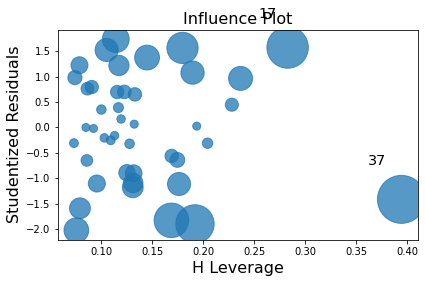

In [18]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)

## Interpretación

9. Examina la importancia relativa de las variables independientes. ¿Qué observas?

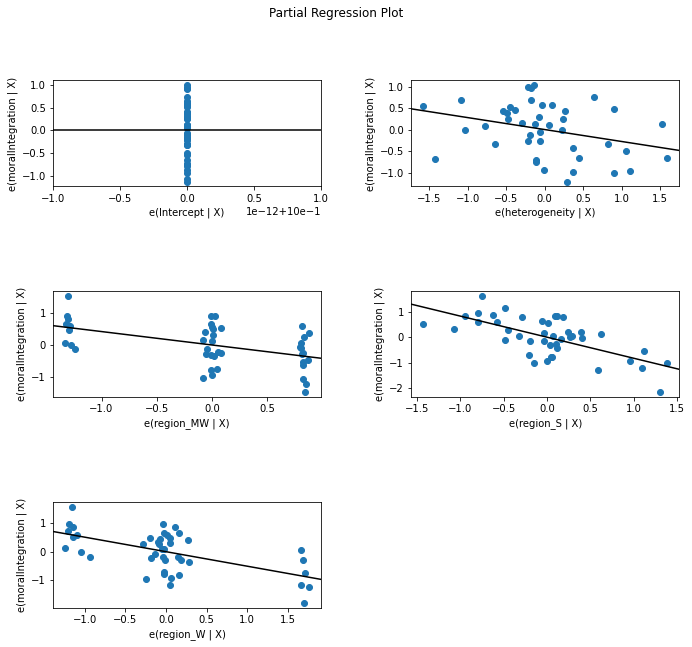

In [19]:
fig = sm.graphics.plot_partregress_grid(new_model)
fig.tight_layout(pad=1.0)
fig.set_size_inches(10,10)

In [20]:
new_model.params.round(3)

Intercept       -0.000
heterogeneity   -0.278
region_MW       -0.422
region_S        -0.826
region_W        -0.509
dtype: float64

10. Examina la multicolinealiad del modelo. ¿Qué observas? ¿Puedes aplicar alguna medida correctiva?

In [21]:
X =  pd.DataFrame(new_model.model.exog, columns= new_model.params.index)
X.corr()

,Intercept,heterogeneity,region_MW,region_S,region_W
Intercept,NaN,NaN,NaN,NaN,NaN
heterogeneity,NaN,1.000000,-0.333873,0.727215,-0.295882
region_MW,NaN,-0.333873,1.000000,-0.482759,-0.279795
region_S,NaN,0.727215,-0.482759,1.000000,-0.279795
region_W,NaN,-0.295882,-0.279795,-0.279795,1.000000


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X =  new_model.model.exog 
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = new_model.params.index
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X, i)
                          for i in range(new_model.model.exog.shape[1])]
vif_data

,feature,VIF
0,Intercept,1.000000
1,heterogeneity,2.169822
2,region_MW,1.727351
3,region_S,2.707942
4,region_W,1.464933
